# 01 – Data Exploration (Credit Card Customers)

Trong notebook này, em sẽ:
- Load dữ liệu BankChurners chỉ bằng thư viện **NumPy** .
- Khám phá cấu trúc dữ liệu: số dòng, số cột, kiểu dữ liệu cơ bản.
- Phân tích đơn giản target `Attrition_Flag`.
- Xem phân bố một số biến quan trọng như `Customer_Age`, `Total_Trans_Amt`, ...
- Đặt các câu hỏi về dữ liệu và trả lời dựa trên dữ liệu.
- Vẽ một số biểu đồ bằng **Matplotlib** và **Seaborn**.


# 0. Khai báo thư viện

In [75]:
import sys
sys.path.append("..") 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import src.data_processing as dp
import src.visualization as vz

plt.style.use("seaborn-v0_8")
sns.set()

# 1.Đọc dữ liệu


In [76]:
csv_path = "../data/raw/BankChurners.csv"

header, raw = dp.load_data(csv_path)
print("Số cột:", len(header))
print("Tên cột:")
for i, col in enumerate(header):
    print(f"{i}: {col}")

print("Raw shape:", raw.shape)


Số cột: 23
Tên cột:
0: CLIENTNUM
1: Attrition_Flag
2: Customer_Age
3: Gender
4: Dependent_count
5: Education_Level
6: Marital_Status
7: Income_Category
8: Card_Category
9: Months_on_book
10: Total_Relationship_Count
11: Months_Inactive_12_mon
12: Contacts_Count_12_mon
13: Credit_Limit
14: Total_Revolving_Bal
15: Avg_Open_To_Buy
16: Total_Amt_Chng_Q4_Q1
17: Total_Trans_Amt
18: Total_Trans_Ct
19: Total_Ct_Chng_Q4_Q1
20: Avg_Utilization_Ratio
21: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
22: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
Raw shape: (10127, 23)


# 2. Tạo X_raw, y (target) & liệt kê feature

In [77]:
# Tách X_raw, y
feature_cols, X_raw, y = dp.split_features_target(header, raw)

print("Feature columns:", feature_cols)
print("X_raw shape:", X_raw.shape)
print("y shape:", y.shape)

Feature columns: ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
X_raw shape: (10127, 19)
y shape: (10127,)


## 3. Thống kê tổng quan & phân bố của cột target 'Attrition_Flag'




Số khách churn: 1627
Số khách existing: 8500


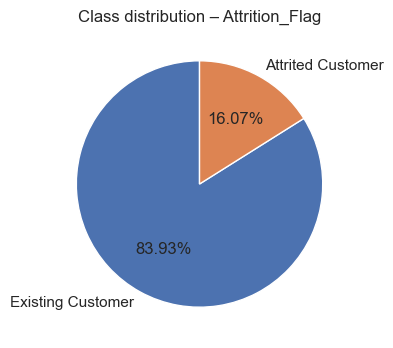

In [78]:
print("Số khách churn:", np.sum(y == 1))
print("Số khách existing:", np.sum(y == 0))
vz.plot_class_distribution(
    y,
    labels=["Existing Customer", "Attrited Customer"],
    title="Class distribution – Attrition_Flag"
)
plt.show()


Dữ liệu bị mất **mất cân bằng**: số khách rời đi nhỏ hơn rất nhiều so với khách còn ở lại.

## 4. Phân loại cột numeric và categorical

Một số cột dạng số:
- Customer_Age, Dependent_count, Months_on_book, ...
- Credit_Limit, Total_Trans_Amt, Total_Trans_Ct, ...

Một số cột dạng category:
- Gender, Education_Level, Marital_Status, Income_Category, Card_Category.


In [79]:
# Nhóm các cột thành categorical và numeric
cat_cols, num_cols, cat_idx, num_idx = dp.get_default_feature_groups(feature_cols)

X_cat = X_raw[:, cat_idx]
X_num = X_raw[:, num_idx].astype(float)

print("X_cat shape:", X_cat.shape)
print("X_num shape:", X_num.shape)
print("Categorical cols:", cat_cols)
print("Numeric cols:", num_cols)

X_cat shape: (10127, 5)
X_num shape: (10127, 14)
Categorical cols: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Numeric cols: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [80]:
# Mô tả các cột numeric
for name in num_cols:
    j = num_cols.index(name)
    dp.describe_numeric_column(X_num[:, j], name)


=== Customer_Age ===
Min : 26.0
Max : 73.0
Mean: 46.32596030413745
Std : 8.01641820891176
25% : 41.0
50% : 46.0
75% : 52.0

=== Dependent_count ===
Min : 0.0
Max : 5.0
Mean: 2.3462032191172115
Std : 1.2988442163662193
25% : 1.0
50% : 2.0
75% : 3.0

=== Months_on_book ===
Min : 13.0
Max : 56.0
Mean: 35.928409203120374
Std : 7.986022008096456
25% : 31.0
50% : 36.0
75% : 40.0

=== Total_Relationship_Count ===
Min : 1.0
Max : 6.0
Mean: 3.8125802310654686
Std : 1.5543311177215595
25% : 3.0
50% : 4.0
75% : 5.0

=== Months_Inactive_12_mon ===
Min : 0.0
Max : 6.0
Mean: 2.3411671768539546
Std : 1.0105725007637258
25% : 2.0
50% : 2.0
75% : 3.0

=== Contacts_Count_12_mon ===
Min : 0.0
Max : 6.0
Mean: 2.4553174681544387
Std : 1.1061705236740995
25% : 2.0
50% : 2.0
75% : 3.0

=== Credit_Limit ===
Min : 1438.3
Max : 34516.0
Mean: 8631.953698034955
Std : 9088.327899308213
25% : 2555.0
50% : 4549.0
75% : 11067.5

=== Total_Revolving_Bal ===
Min : 0.0
Max : 2517.0
Mean: 1162.8140614199665
Std : 814.947

In [81]:
# Mô tả các cột categorical
for name in cat_cols:
    j = cat_cols.index(name)
    dp.describe_categorical_column(X_cat[:, j], name)

=== Gender ===
F: 5358
M: 4769

=== Education_Level ===
College: 1013
Doctorate: 451
Graduate: 3128
High School: 2013
Post-Graduate: 516
Uneducated: 1487
Unknown: 1519

=== Marital_Status ===
Divorced: 748
Married: 4687
Single: 3943
Unknown: 749

=== Income_Category ===
$120K +: 727
$40K - $60K: 1790
$60K - $80K: 1402
$80K - $120K: 1535
Less than $40K: 3561
Unknown: 1112

=== Card_Category ===
Blue: 9436
Gold: 116
Platinum: 20
Silver: 555



# 5. Biểu đồ phân bố của một vài trường dữ liệu

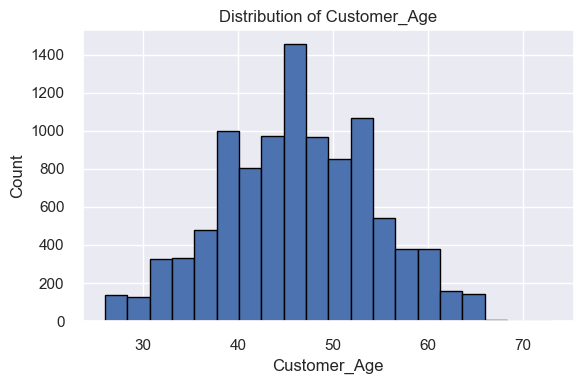

In [82]:
age = X_num[:, num_cols.index("Customer_Age")]
vz.plot_histogram(
    age,
    bins=20,
    xlabel="Customer_Age",
    ylabel="Count",
    title="Distribution of Customer_Age",
    logy=False
)

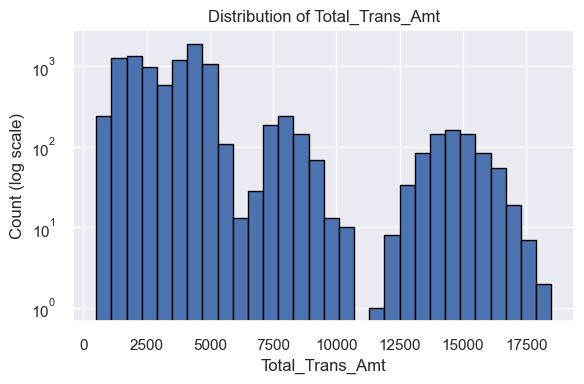

In [83]:
trans_amt = X_num[:, num_cols.index("Total_Trans_Amt")]
vz.plot_histogram(
    trans_amt,
    bins=30,
    xlabel="Total_Trans_Amt",
    ylabel="Count (log scale)",
    title="Distribution of Total_Trans_Amt",
    logy=True
)


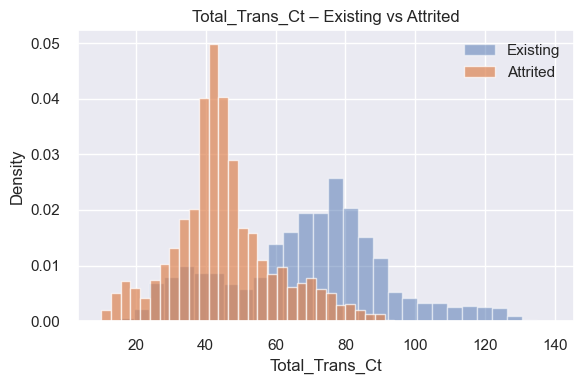

In [84]:
trans_ct = X_num[:, num_cols.index("Total_Trans_Ct")]
vz.plot_histogram_by_class(
    trans_ct,
    y,
    bins=30,
    labels=("Existing", "Attrited"),
    xlabel="Total_Trans_Ct",
    ylabel="Density",
    title="Total_Trans_Ct – Existing vs Attrited"
)


# 6. Kiểm định giả thuyết: So sánh `Total_Trans_Amt` giữa khách churn và không churn

**Mục tiêu:**  
Kiểm tra xem **tổng số tiền giao dịch trong 1 năm (`Total_Trans_Amt`)** của khách hàng rời đi (Attrited) có khác so với khách hàng còn ở lại (Existing) hay không.

## 6.1. Thiết lập giả thuyết

- $H_0$: \($\mu_{\text{churn}}$ = $\mu_{\text{non-churn}}$\)  
  > Trung bình `Total_Trans_Amt` của hai nhóm khách **bằng nhau**.

- $H_1$: \($\mu_{\text{churn}}$ $\neq \mu_{\text{non-churn}}$\)  
  > Trung bình `Total_Trans_Amt` của hai nhóm khách **khác nhau**.

Mức ý nghĩa chọn: \($\alpha$ = 0.05\).



In [85]:
# So sánh mean Total_Trans_Amt giữa churn vs non-churn
trans_amt_churn = trans_amt[y == 1]
trans_amt_stay  = trans_amt[y == 0]

m1 = np.mean(trans_amt_churn)
m0 = np.mean(trans_amt_stay)
s1 = np.var(trans_amt_churn, ddof=1)
s0 = np.var(trans_amt_stay, ddof=1)
n1 = trans_amt_churn.shape[0]
n0 = trans_amt_stay.shape[0]

t_num = m1 - m0
t_den = np.sqrt(s1/n1 + s0/n0)
t_stat = t_num / t_den

print("Mean Total_Trans_Amt (churn)   :", m1)
print("Mean Total_Trans_Amt (non-churn):", m0)
print("t-statistic:", t_stat)
if abs(t_stat) > 1.96:
    print("Kết luận: Có sự khác biệt có ý nghĩa thống kê giữa mean Total_Trans_Amt của churn và non-churn")
else:
    print("Kết luận: Không có sự khác biệt có ý nghĩa thống kê giữa mean Total_Trans_Amt của churn và non-churn")



Mean Total_Trans_Amt (churn)   : 3095.025814382299
Mean Total_Trans_Amt (non-churn): 4654.655882352941
t-statistic: -22.685916529888694
Kết luận: Có sự khác biệt có ý nghĩa thống kê giữa mean Total_Trans_Amt của churn và non-churn


## 6.2. Kết quả tính toán bằng NumPy

- Mean `Total_Trans_Amt` (churn): **3095.03**  
- Mean `Total_Trans_Amt` (non-churn): **4654.66**  
- Giá trị thống kê kiểm định \(t\): **-22.69**

Với cỡ mẫu lớn, ta có thể so sánh $|t|$ với ngưỡng xấp xỉ 1.96 (chuẩn hoá theo phân phối chuẩn).

- \($|t|$ = 22.69 $\gg$ 1.96\)

## 6.3. Kết luận

Vì $|t|$ lớn hơn rất nhiều so với ngưỡng 1.96, ta **bác bỏ giả thuyết không $H_0$** ở mức ý nghĩa 5%.  

Điều này cho thấy:

- Có bằng chứng thống kê mạnh mẽ rằng **trung bình `Total_Trans_Amt` của khách churn khác với khách non-churn**.
- Quan sát từ mean:
  - Khách **churn**: ~**3.1k**  
  - Khách **non-churn**: ~**4.7k**  

=> Khách hàng rời đi **chi tiêu ít hơn đáng kể** so với những khách ở lại. Đây là một dấu hiệu cho thấy nhóm khách có mức chi tiêu thấp và ít sử dụng thẻ có khả năng rời đi cao hơn.

# 7. Phân tích dữ liệu dựa trên câu hỏi

Trong phần này, em sẽ **đặt một số câu hỏi** liên quan đến bài toán churn và
**trả lời chúng dựa trên dữ liệu** (NumPy + trực quan hoá).

Các câu hỏi:

1. Khách hàng **nam hay nữ** có tỷ lệ rời đi (churn) cao hơn?
2. **Nhóm tuổi** nào có tỷ lệ churn cao hơn?
3. Tỷ lệ churn thay đổi như thế nào theo **Income_Category** (nhóm thu nhập)?
4. Khách có **tần suất giao dịch cao** (nhiều `Total_Trans_Ct`) thì churn nhiều hay ít hơn?



### Câu hỏi 1: Khách hàng nam hay nữ có tỷ lệ rời đi cao hơn?

Giả thuyết:
- Có thể khách nữ dùng thẻ “trung thành” hơn, hoặc ngược lại.
- Em sẽ tính **tỷ lệ churn** cho từng giới tính `Gender` và so sánh.


In [86]:
# Lấy cột Gender
gender_col = X_cat[:, cat_cols.index("Gender")]
genders = np.unique(gender_col)

print("Tỷ lệ churn theo Gender:\n")
for g in genders:
    mask = (gender_col == g)
    total = np.sum(mask)
    churn = np.sum(y[mask] == 1)
    rate = churn / total if total > 0 else 0.0
    print(f"Gender = {g} | total={total:5d} | churn={churn:5d} | rate={rate:.3f}")


Tỷ lệ churn theo Gender:

Gender = F | total= 5358 | churn=  930 | rate=0.174
Gender = M | total= 4769 | churn=  697 | rate=0.146


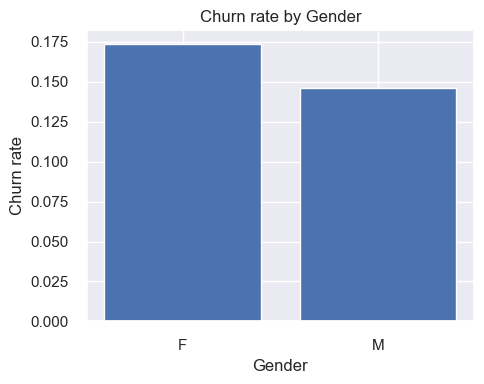

In [87]:
rates = []
sizes = []
for g in genders:
    mask = (gender_col == g)
    total = np.sum(mask)
    churn = np.sum(y[mask] == 1)
    rate = churn / total if total > 0 else 0.0
    rates.append(rate)
    sizes.append(total)

plt.figure(figsize=(5, 4))
plt.bar(genders, rates)
plt.xlabel("Gender")
plt.ylabel("Churn rate")
plt.title("Churn rate by Gender")
plt.tight_layout()
plt.show()


### Trả lời câu hỏi 1: 
Từ bảng và biểu đồ, có thể thấy:

- Tỷ lệ churn của nhóm **Nữ** là khoảng **17.4%**,  
- Trong khi nhóm **Nam** là khoảng **14.6%**.

=>  Nhìn chung, khách hàng giới tính **Nữ** có xu hướng rời đi nhiều hơn một chút so với khách hàng có giới tính là nam.

### Câu hỏi 2: Nhóm tuổi nào có tỷ lệ churn cao hơn?

Em sẽ chia khách hàng thành 4 nhóm tuổi:
- \< 30
- 30–39
- 40–49
- $\ge$ 50

Sau đó tính tỷ lệ churn cho từng nhóm.


In [88]:
age = X_num[:, num_cols.index("Customer_Age")]

bins = [0, 30, 40, 50, 100]
labels = ["<30", "30-39", "40-49", ">=50"]

rates = []

age_group = np.empty(age.shape[0], dtype=object)
for i, (low, high) in enumerate(zip(bins[:-1], bins[1:])):
    mask = (age >= low) & (age < high)
    age_group[mask] = labels[i]

print("Tỷ lệ churn theo nhóm tuổi:\n")
for lab in labels:
    mask = (age_group == lab)
    total = np.sum(mask)
    churn = np.sum(y[mask] == 1)
    rate = churn / total if total > 0 else 0.0
    rates.append(rate)
    print(f"Age group {lab:5s} | total={total:5d} | churn={churn:5d} | rate={rate:.3f}")


Tỷ lệ churn theo nhóm tuổi:

Age group <30   | total=  195 | churn=   17 | rate=0.087
Age group 30-39 | total= 1841 | churn=  261 | rate=0.142
Age group 40-49 | total= 4561 | churn=  772 | rate=0.169
Age group >=50  | total= 3530 | churn=  577 | rate=0.163


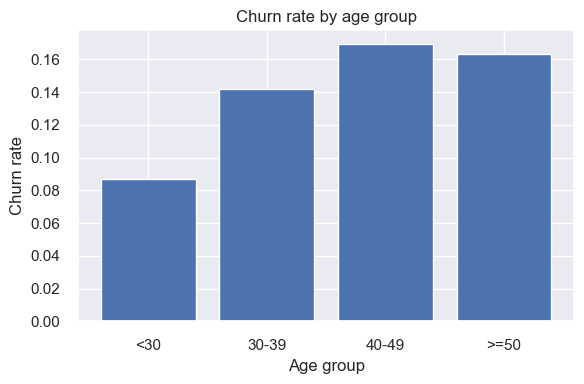

In [89]:
plt.figure(figsize=(6, 4))
plt.bar(labels, rates)
plt.xlabel("Age group")
plt.ylabel("Churn rate")
plt.title("Churn rate by age group")
plt.tight_layout()
plt.show()


### Trả lời câu hỏi 2: 

Dựa vào kết quả của bảng và biểu đồ ta có nhận xét sau:

Nhóm **40–49 tuổi** có tỷ lệ churn **cao nhất** (~16.9%), kế đến là nhóm **≥ 50 tuổi** (~16.3%).  
Nhóm **trẻ \< 30 tuổi** có tỷ lệ churn **thấp nhất** (~8.7%).

Có thể thấy khi tuổi tăng lên (đặc biệt từ 40 trở đi), khách hàng có xu hướng **rời đi nhiều hơn**, trong khi nhóm rất trẻ dưới 30 tuổi lại tương đối ổn định hơn trong dữ liệu này.


### Câu hỏi 3: Nhóm thu nhập nào có tỷ lệ churn cao hơn?

Em kiểm tra tỷ lệ churn theo `Income_Category` để xem:
- Khách thu nhập thấp có dễ rời đi hơn không?
- Hay khách thu nhập cao mới là nhóm khó giữ?


In [90]:
inc_col = X_cat[:, cat_cols.index("Income_Category")]
incs = np.unique(inc_col)
rates = []
labels = []
for inc in incs:
    mask = (inc_col == inc)
    total = np.sum(mask)
    churn = np.sum(y[mask] == 1)
    rate = churn / total if total > 0 else 0.0
    rates.append(rate)
    labels.append(inc)
    #print(f"{inc:20s} | total={total:5d} | churn={churn:5d} | rate={rate:.3f}")



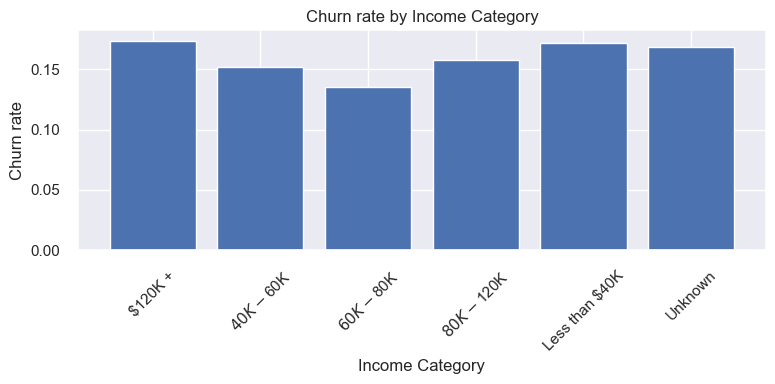

In [91]:
# Trực quan hóa tỷ lệ churn theo Income_Category
plt.figure(figsize=(8, 4))
plt.bar(labels, rates)
plt.xlabel("Income Category")
plt.ylabel("Churn rate")
plt.title("Churn rate by Income Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Trả lời câu hỏi 3:

**Nhận xét:**

- Nhóm thu nhập **\$120K+** có tỷ lệ churn **cao nhất** (~17.3%), rất sát với nhóm **thu nhập thấp \<\$40K** (~17.2%).  
- Nhóm **\$60K–\$80K** là nhóm **ổn định nhất**, tỷ lệ churn thấp nhất (~13.5%).  

Điều này gợi ý một “đường cong chữ U”:  
- Khách **thu nhập rất thấp** hoặc **rất cao** đều có xu hướng rời đi nhiều hơn,  
- Trong khi nhóm thu nhập **trung bình–khá (\$60K–\$80K)** là nhóm trung thành nhất trong dữ liệu hiện tại.


### Câu hỏi 4: Khách có tần suất giao dịch cao churn nhiều hay ít?

Giả thuyết:
- Khách giao dịch **nhiều** (hoạt động thường xuyên) sẽ **gắn bó hơn**, nên tỷ lệ churn thấp hơn.

Tiến hành các bước như sau:
- Tính median của `Total_Trans_Ct`,
- Chia khách thành 2 nhóm: `Low-activity` và `High-activity`,
- So sánh tỷ lệ churn giữa 2 nhóm.


In [92]:
trans_ct = X_num[:, num_cols.index("Total_Trans_Ct")]
median_ct = np.median(trans_ct)
#print("Median Total_Trans_Ct:", median_ct)

is_high = trans_ct > median_ct
labels = ["Low-activity (<= median)", "High-activity (> median)"]
rates = []
for label, mask in [("Low-activity (<= median)", ~is_high),
                    ("High-activity (> median)",  is_high)]:
    total = np.sum(mask)
    churn = np.sum(y[mask] == 1)
    rate = churn / total if total > 0 else 0.0
    rates.append(rate)
    #print(f"{label:25s} | total={total:5d} | churn={churn:5d} | rate={rate:.3f}")


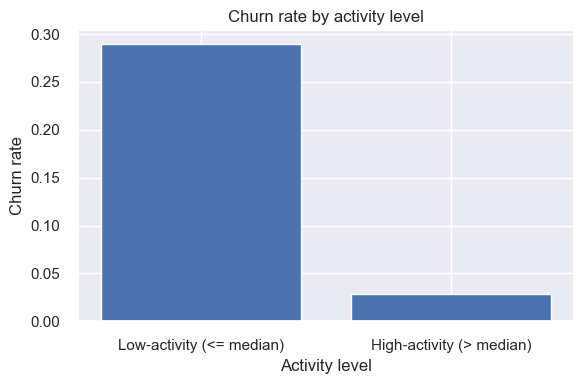

In [93]:
# Trực quan hóa tỉ lệ churn theo mức độ hoạt động
plt.figure(figsize=(6, 4))
plt.bar(labels, rates)
plt.xlabel("Activity level")
plt.ylabel("Churn rate")
plt.title("Churn rate by activity level")
plt.tight_layout()
plt.show()

### Trả lời câu hỏi 4:


**Nhận xét:**

- Nhóm khách **ít giao dịch** ($\le$ 67 giao dịch/năm) có tỷ lệ churn gần **29%**,  
- Trong khi nhóm **giao dịch nhiều** (> 67 giao dịch/năm) chỉ khoảng **3%**.

=> Đây là chênh lệch cực kỳ lớn, cho thấy **mức độ hoạt động giao dịch là yếu tố rất mạnh liên quan đến churn**.  
Khách hàng ít sử dụng thẻ (giao dịch ít hơn hoặc bằng 67 lần/năm) có nguy cơ rời đi **cao gấp nhiều lần** so với những khách giao dịch thường xuyên.  
